In [1]:
#expand cell width to 100%
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
from ast import literal_eval
import re

In [3]:
import pandas as pd
dataFrameAddress="E:/GammaRaySpectroscopy/Dataset/5DegreeDataset.csv"
dataFrame=pd.read_csv(dataFrameAddress)

In [4]:
dataFrame.head()

,Unnamed: 0,minLats,maxLats,minLongs,maxLongs,averageSpectra,aluminum,calcium,iron,magnesium,oxygen,potassium,silicon,thorium,titanium,uranium
0,0,-90.0,-87.5,-180.0,180.0,[29.81520623 6.77182229 6.50824773 8.760701...,15.151,11.456,3.6233,3.5168,45.289,299.99,20.793,0.46453,0.17034,0.17684
1,1,-87.5,-82.5,-180.0,-135.0,[23.23357393 5.64114848 6.28640883 8.026030...,13.394,10.459,4.2466,4.2240,45.529,376.77,22.029,0.65727,0.11806,0.14017
2,2,-87.5,-82.5,-135.0,-90.0,[23.23357393 5.64114848 6.28640883 8.026030...,13.634,12.915,4.1853,3.5352,44.660,375.20,20.907,0.59783,0.16417,0.25209
3,3,-87.5,-82.5,-90.0,-45.0,[23.23357393 5.64114848 6.28640883 8.026030...,14.642,12.301,3.8019,3.6490,44.706,255.60,20.687,0.44024,0.21359,0.15456
4,4,-87.5,-82.5,-45.0,0.0,[23.23357393 5.64114848 6.28640883 8.026030...,14.030,13.188,3.6497,3.4253,44.777,299.84,20.930,0.41695,0.00000,0.17853


In [5]:
averageSpectra=dataFrame['averageSpectra']
#iterate through the spectra
for i in range(averageSpectra.shape[0]):
    #remove new line characters
    averageSpectra[i]=averageSpectra[i].replace('\n','')
    averageSpectra[i]=averageSpectra[i].strip()
    averageSpectra[i]=averageSpectra[i].replace(' ',',')
    averageSpectra[i]=np.array(list(map(float,re.findall("-?\d+\.\d+",averageSpectra[i]))))
#convert the spectra to numpy array
averageSpectra=averageSpectra.to_numpy()
averageSpectra=np.vstack(averageSpectra)

C:\Users\sandy\AppData\Local\Temp\ipykernel_2104\2164734755.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  averageSpectra[i]=averageSpectra[i].replace('\n','')
C:\Users\sandy\AppData\Local\Temp\ipykernel_2104\2164734755.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  averageSpectra[i]=averageSpectra[i].strip()
C:\Users\sandy\AppData\Local\Temp\ipykernel_2104\2164734755.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  averag

In [6]:
#get abundance values
abundances=dataFrame['oxygen'].to_numpy()
#scale the values between 0 and 1
scaledAbundances=(abundances-np.amin(abundances))/np.ptp(abundances)

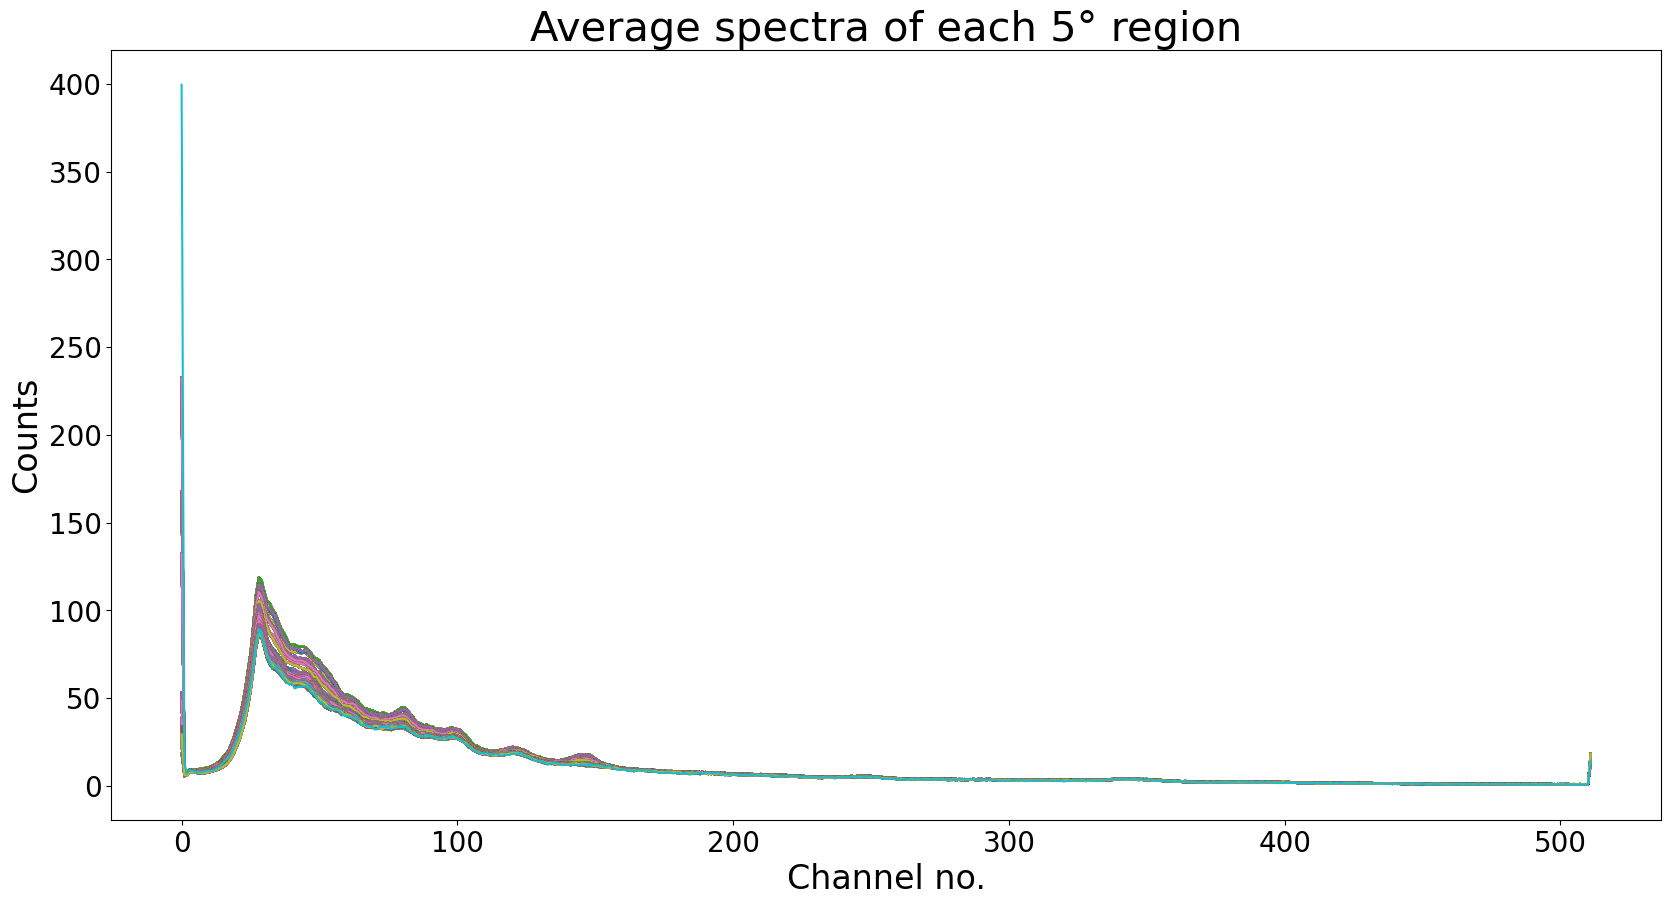

In [7]:
#plot all the spectra
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Channel no.",fontsize=24)
plt.ylabel("Counts",fontsize=24)
plt.title("Average spectra of each 5\u00B0 region",fontsize=30)

#get create an array containing number of bands
channels=np.arange(averageSpectra.shape[1])
for i in range(averageSpectra.shape[0]):
    plt.plot(channels,averageSpectra[i,:])

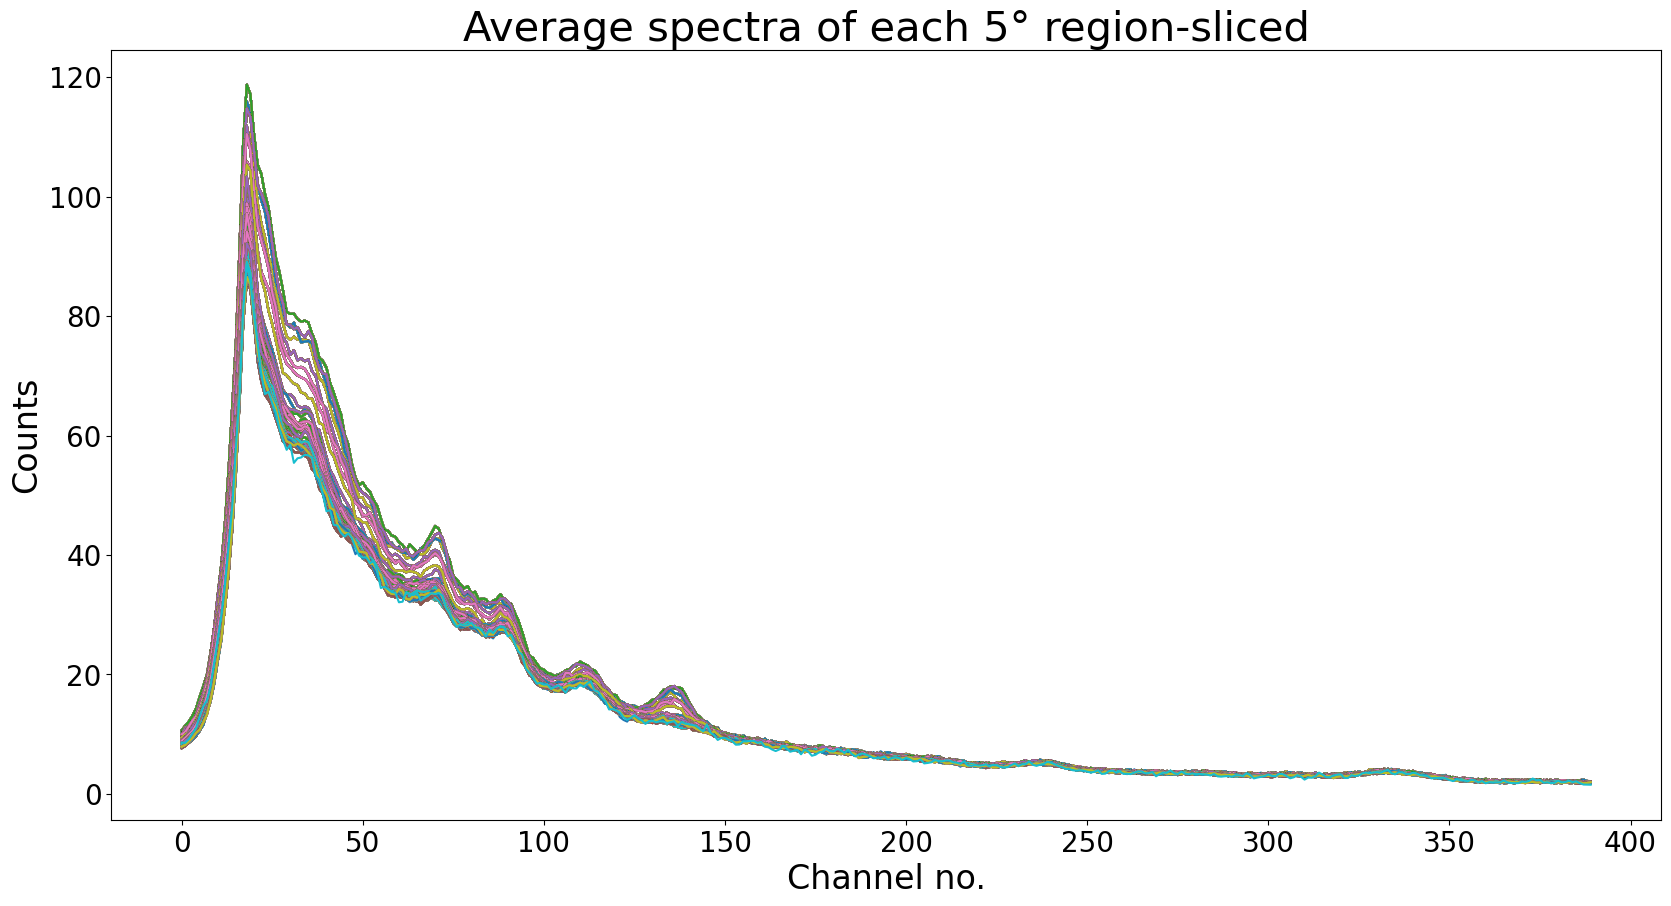

In [8]:
#subset the spectra to remove the first and last parts that have no features
averageSpectra=averageSpectra[:,10:400]
plt.figure(figsize=(20,10))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Channel no.",fontsize=24)
plt.ylabel("Counts",fontsize=24)
plt.title("Average spectra of each 5\u00B0 region-sliced",fontsize=30)

#get create an array containing number of bands
channels=np.arange(averageSpectra.shape[1])
for i in range(averageSpectra.shape[0]):
    plt.plot(channels,averageSpectra[i,:])

In [9]:
#get no. of channels in the spectra
noOfChannels=averageSpectra.shape[1]
print(f"No of channels in the spectra:{noOfChannels}")
#set a seed value to be used everywhere for reproducability
globalSeed=1.435

No of channels in the spectra:390


In [10]:
#import tensorflow
import tensorflow as tf

In [11]:
#create the Neural network grapgh containing an input layer
inputLayer=tf.keras.Input(shape=(noOfChannels,1))
nnGraph=inputLayer

In [12]:
#create the first convolutional block
#convolve with filters of size 5
firstConvolutionalLayer=tf.keras.layers.Conv1D(filters=8,kernel_size=5,strides=1,padding='valid',name="first_Conv_Layer")
nnGraph=firstConvolutionalLayer(nnGraph)
#apply relu activation
firstActivationLayer=tf.keras.layers.Activation('relu',name="first_activation")
nnGraph=firstActivationLayer(nnGraph)

#apply batch normalization
firstBatchNormLayer=tf.keras.layers.BatchNormalization(name="first_batch_norm")
nnGraph=firstBatchNormLayer(nnGraph)
#apply dropout
firstDropOutLayer=tf.keras.layers.Dropout(0.5,noise_shape=None,seed=globalSeed,name="first_dropout")
nnGraph=firstDropOutLayer(nnGraph)

In [13]:
#create the second convolutional block
#convolve with filters of size 5
secondConvolutionalLayer=tf.keras.layers.Conv1D(filters=8,kernel_size=5,strides=2,padding='valid',name="second_Conv_Layer")
nnGraph=secondConvolutionalLayer(nnGraph)
#apply relu activation
secondActivationLayer=tf.keras.layers.Activation('relu',name="second_activation")
nnGraph=secondActivationLayer(nnGraph)
#apply batch normalization
secondBatchNormLayer=tf.keras.layers.BatchNormalization(name="second_batch_norm")
nnGraph=secondBatchNormLayer(nnGraph)
#apply dropout
secondDropOutLayer=tf.keras.layers.Dropout(0.4,noise_shape=None,seed=globalSeed,name="second_dropout")
nnGraph=secondDropOutLayer(nnGraph)

In [14]:
#create the fully connected block
#flatten the features recieved from the third convolutional block
flattenFeatureVector=tf.keras.layers.Flatten()
nnGraph=flattenFeatureVector(nnGraph)
#add the first fully connected layer
firstFullyConnectedLayer=tf.keras.layers.Dense(300,activation='relu',name='first_fully_cont')
nnGraph=firstFullyConnectedLayer(nnGraph)
#add the second fully connected layer
secondFullyConnectedLayer=tf.keras.layers.Dense(100,activation='relu',name='second_fully_cont')
nnGraph=secondFullyConnectedLayer(nnGraph)
#add the output  layer
outputLayer=tf.keras.layers.Dense(1,activation='sigmoid',name='outputLayer')
nnGraph=outputLayer(nnGraph)

In [15]:
#build the network
oxygenAbundanceEstimator=tf.keras.Model(inputs=inputLayer,outputs=nnGraph,name="oxygenAbundanceEstimator")

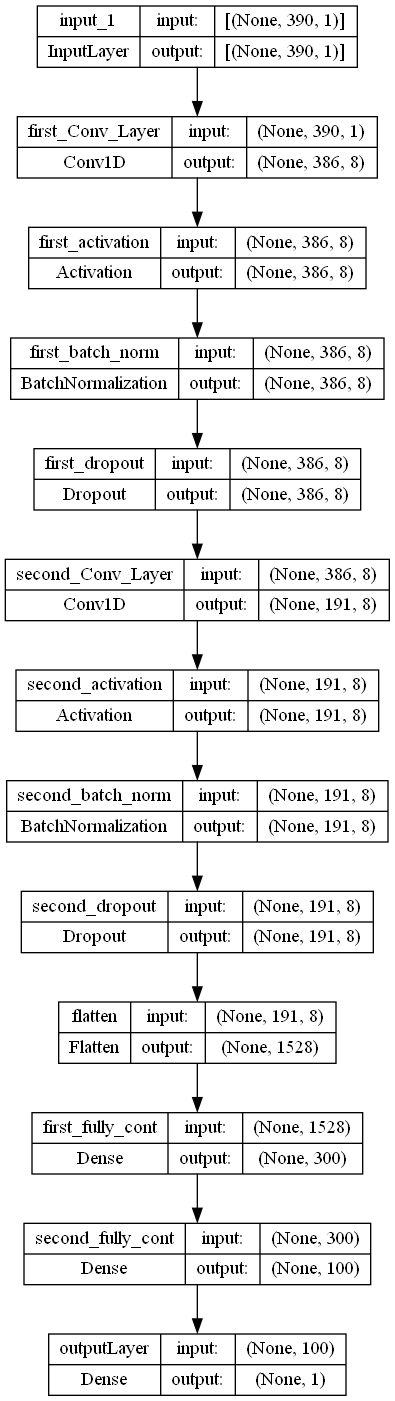

In [16]:
#show the architecture
tf.keras.utils.plot_model(oxygenAbundanceEstimator,to_file='E:/LunarProspectorTest/Oxygen_CNN_architecture.png',show_shapes=True)

In [17]:
#break the dataset into training and test sets
from sklearn.model_selection import train_test_split
averageSpectraTrain,averageSpectraTest,abundancesTrain,abundancesTest=train_test_split(averageSpectra,
                                                                                       scaledAbundances,test_size=0.2)
del train_test_split 

In [18]:
#create the optimizer
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5)
#define the loss
lossCalculator=tf.keras.losses.MeanSquaredError()
#define number of epochs for which the network is to be trained
totalNoOfEpochs=1250
#define the batch size
batchSize=1432

In [19]:
#check if the GPU is available
if len(tf.config.list_physical_devices('GPU'))==1:
    print("GPU available")
else:
    print("GPU unavailable")

GPU available


In [20]:
#create lists to hold the training and test losses
trainingLoss=[]
testLoss=[]

In [21]:
#train the network for the specified number of epochs
for currentEpoch in range(totalNoOfEpochs):
    #iterate over all samples with a fixed batch sizes
    for i in range(0,averageSpectraTrain.shape[0],batchSize):

        #compute the gradient and use it update the weights
        with tf.GradientTape() as tape:
            #compute the ouput from the network
            predictedAbundances=oxygenAbundanceEstimator(averageSpectraTrain[:,:])
            #compute the Loss
            loss=lossCalculator(tf.cast(predictedAbundances,
                                        tf.float32),
                                tf.cast((abundancesTrain[:]),
                                        tf.float32))

        #compute the gradient for the total loss
        gradientValues=tape.gradient(loss,oxygenAbundanceEstimator.trainable_variables)
        #optimize for the loss
        optimizer.apply_gradients(zip(gradientValues,oxygenAbundanceEstimator.trainable_variables))
    #print the gradient at every 100 epochs
    if currentEpoch%100==0:
        print(f"Epoch {currentEpoch} Gradient={round(np.sum([tf.math.reduce_mean(g) for g in gradientValues]),4)}")
    #save the training loss for the last batch
    trainingLoss.append(loss)
    #compute the test loss
    #iterate over all samples with a fixed batch sizes
    for i in range(0,averageSpectraTest.shape[0],batchSize):
        #compute the ouput from the network
            predictedAbundances=oxygenAbundanceEstimator(averageSpectraTest[:,:])
            #compute the Loss
            loss=lossCalculator(tf.cast(predictedAbundances,
                                        tf.float32),
                                tf.cast((abundancesTest[:]),
                                        tf.float32))
    #save the test loss for the last batch
    testLoss.append(loss)

Epoch 0 Gradient=-0.2962000072002411
Epoch 100 Gradient=-0.002300000051036477
Epoch 200 Gradient=-0.0010999999940395355
Epoch 300 Gradient=-0.0012000000569969416
Epoch 400 Gradient=-0.002199999988079071
Epoch 500 Gradient=-0.002099999925121665
Epoch 600 Gradient=-0.002400000113993883
Epoch 700 Gradient=-0.0027000000700354576
Epoch 800 Gradient=-0.003800000064074993
Epoch 900 Gradient=-0.0020000000949949026
Epoch 1000 Gradient=-0.0020000000949949026
Epoch 1100 Gradient=-0.00279999990016222
Epoch 1200 Gradient=-0.0034000000450760126


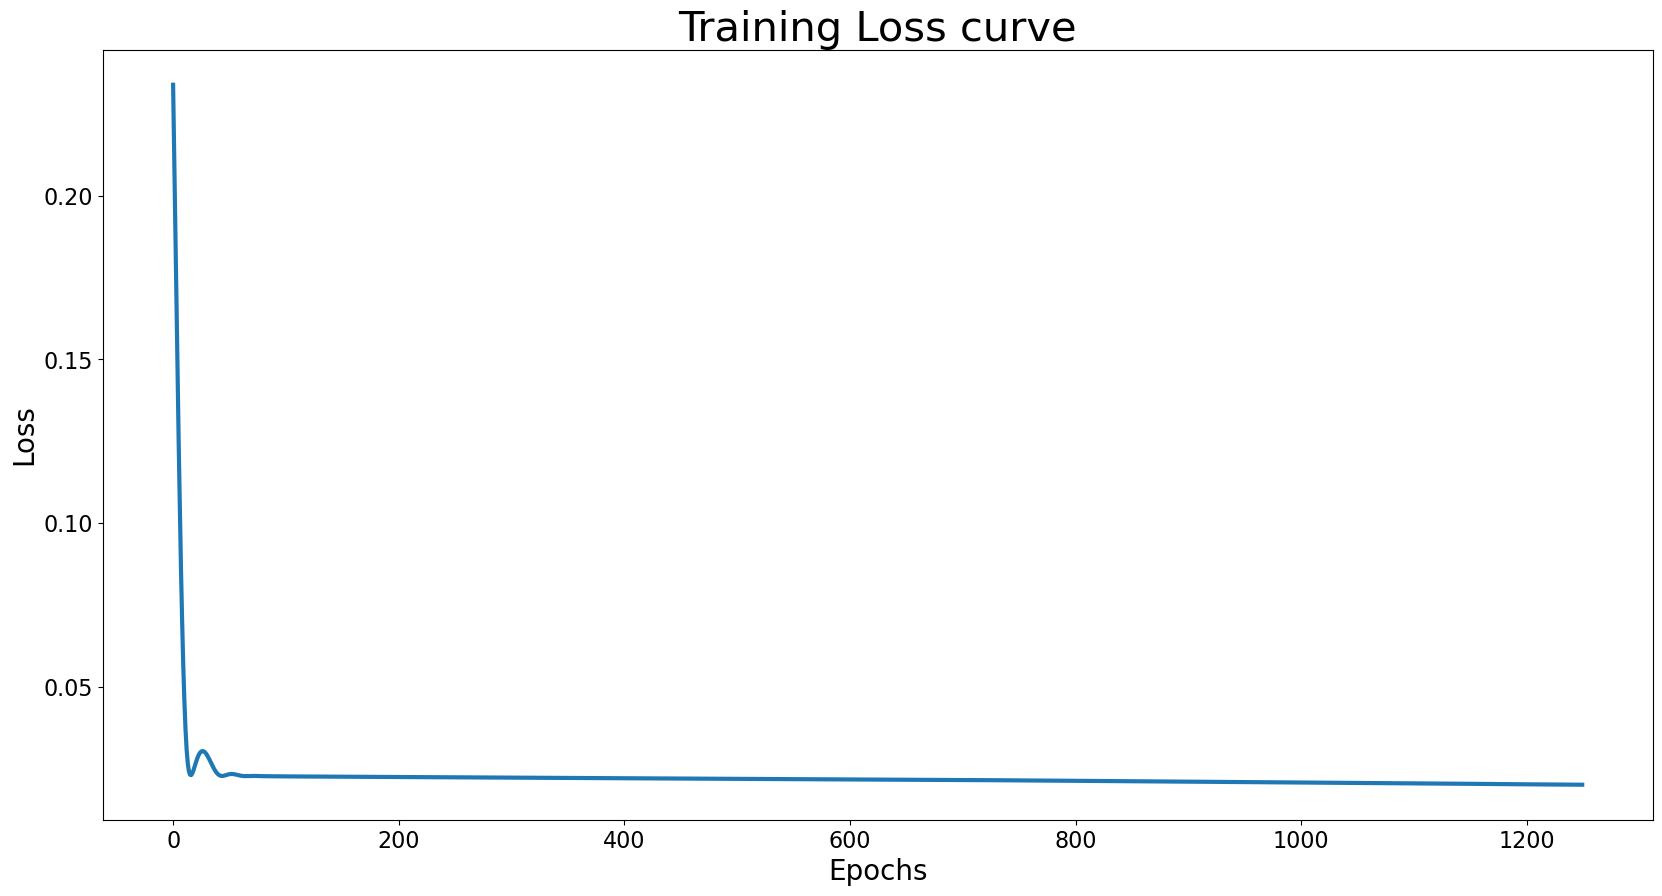

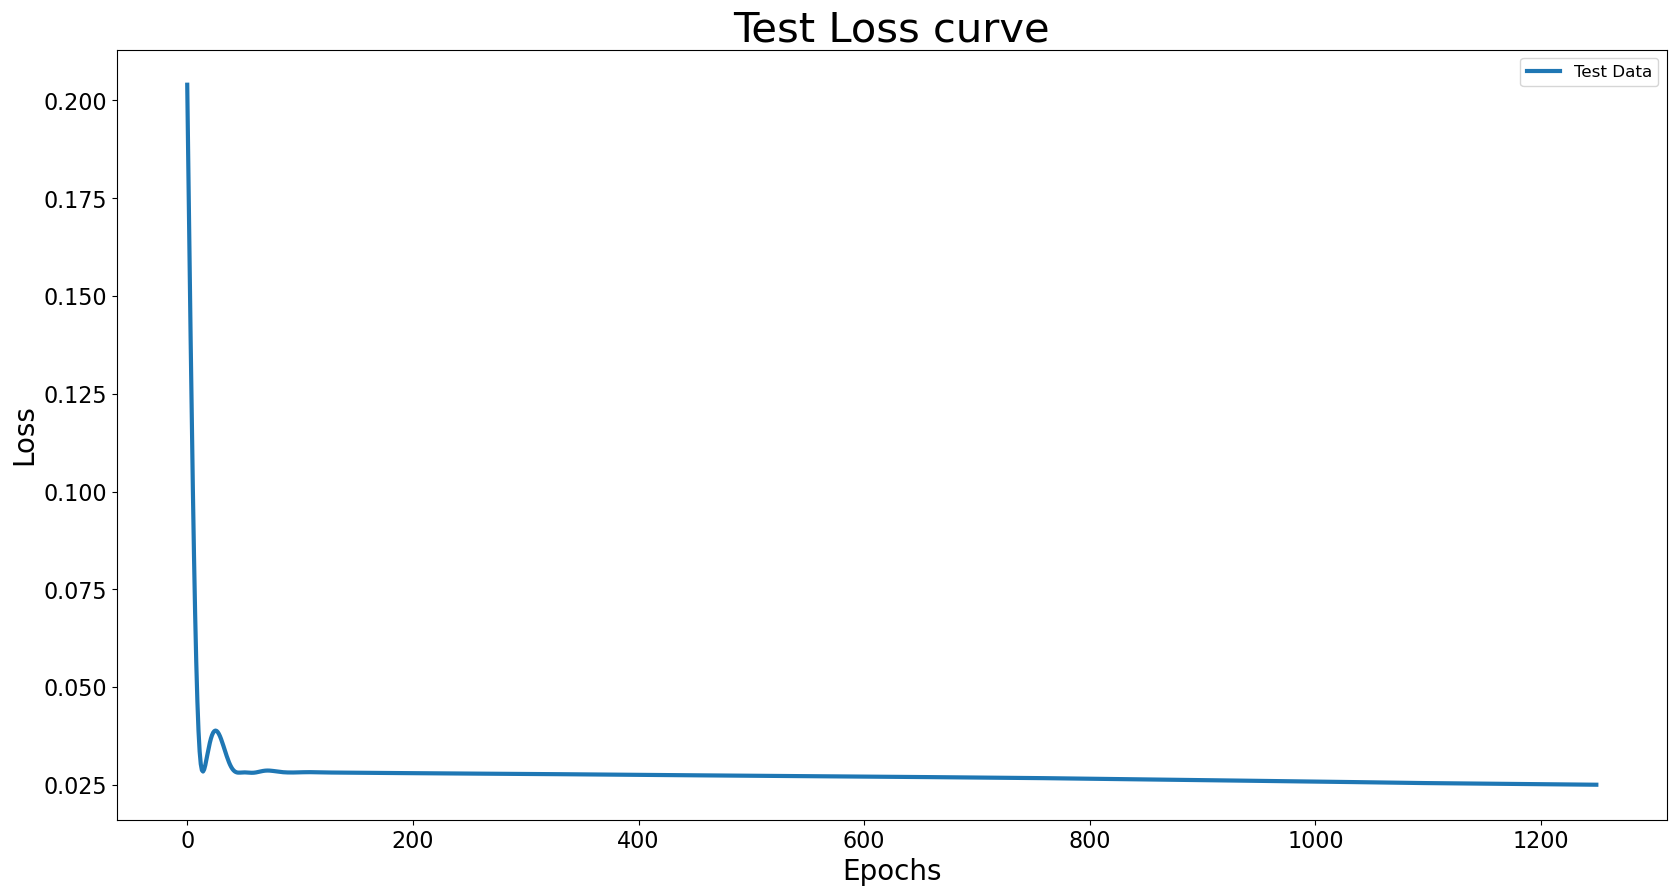

In [22]:
epochList=np.arange(totalNoOfEpochs)
#plot the loss decay
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.title("Training Loss curve",fontsize=30)
plt.xlabel("Epochs",fontsize=20)
plt.ylabel("Loss",fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.plot(epochList[:],trainingLoss[:],lw=3,label="Training Data")
plt.figure(figsize=(20,10))
plt.title("Test Loss curve",fontsize=30)
plt.xlabel("Epochs",fontsize=20)
plt.ylabel("Loss",fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.plot(epochList,testLoss,lw=3,label="Test Data")
plt.legend(loc="best",fontsize=12)

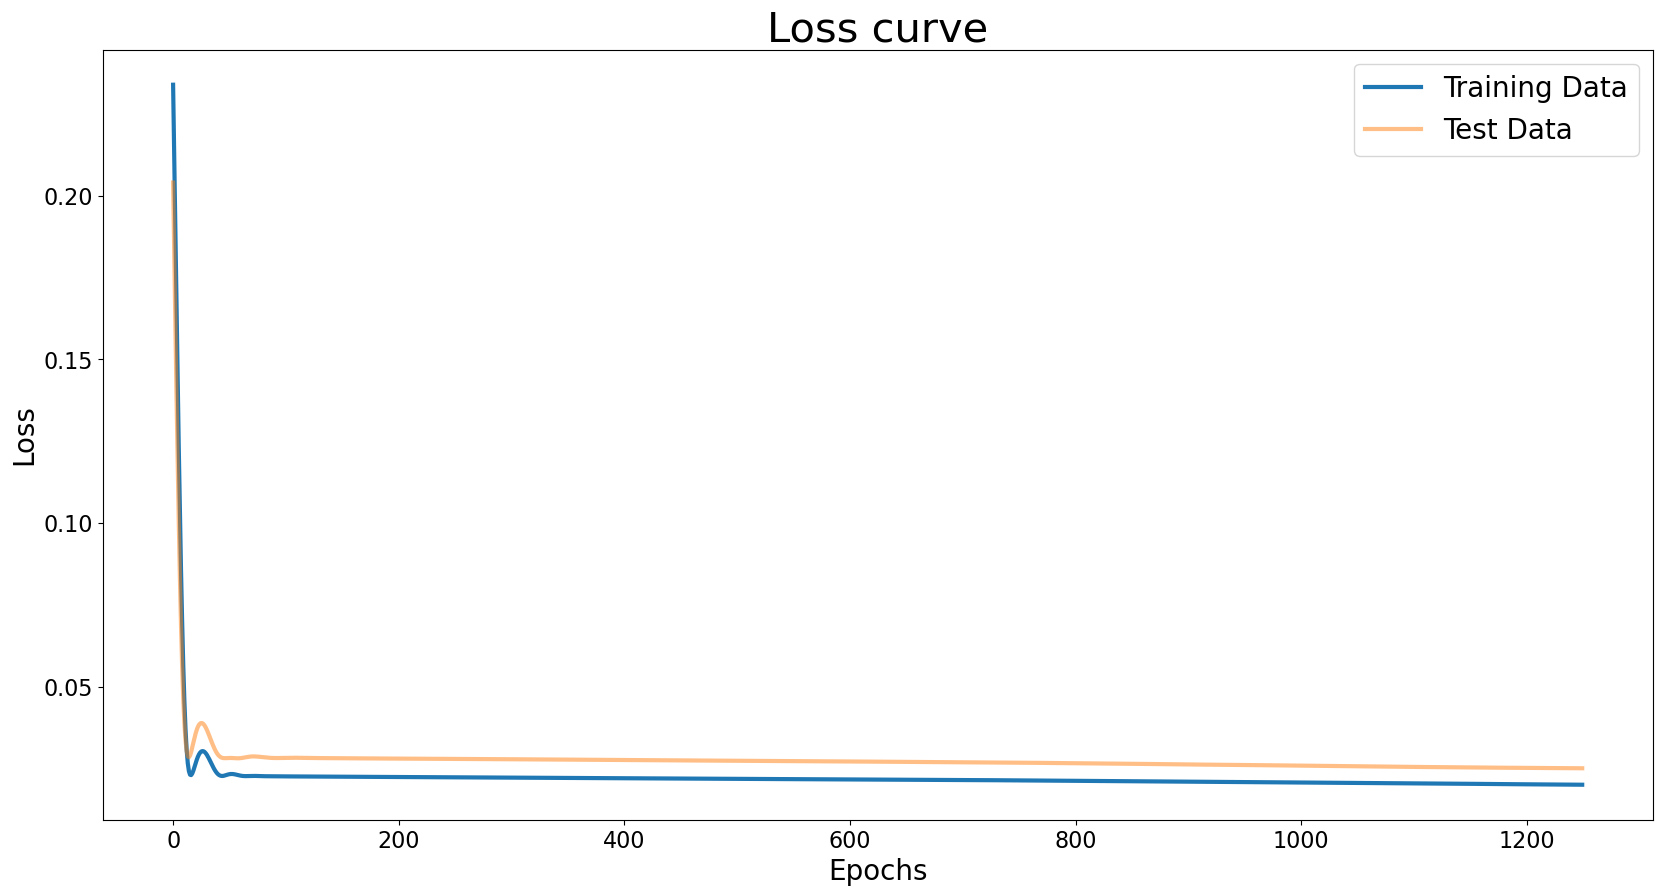

In [26]:
epochList=np.arange(totalNoOfEpochs)
#plot the loss decay
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.title("Loss curve",fontsize=30)
plt.xlabel("Epochs",fontsize=20)
plt.ylabel("Loss",fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.plot(epochList[:],trainingLoss[:],lw=3,label="Training Data")
plt.plot(epochList,testLoss,lw=3,alpha=0.5,label="Test Data")
plt.legend(loc="best",fontsize=20)

In [24]:
#estimate the abundances for the training and test spectra using the trained model
estimatedAbundancesTrainingSet=oxygenAbundanceEstimator(averageSpectraTrain).numpy()
estimatedAbundancesTestSet=oxygenAbundanceEstimator(averageSpectraTest).numpy()
#compute the R2-score of each mineral
trainingR2Scores=0
testingR2Scores=0
from sklearn.metrics import mean_squared_error
trainingRMSE=mean_squared_error(abundancesTrain,estimatedAbundancesTrainingSet,squared=False)
testingRMSE=mean_squared_error(abundancesTest,estimatedAbundancesTestSet,squared=False)

In [25]:
#print the results
print(f"Oxygen----\t----RMSE for training data:{round(trainingRMSE,2)}--\t--RMSE for test data:{round(testingRMSE,2)}--\t--Min. Value:{np.amin(scaledAbundances)}--\t--Maxs. Value:{np.amax(scaledAbundances)}--\t--Avg. Value:{round(np.mean(scaledAbundances),2)}")

Oxygen----	----RMSE for training data:0.14--	--RMSE for test data:0.16--	--Min. Value:0.0--	--Maxs. Value:1.0--	--Avg. Value:0.68
